# Visualizing TWC Datasets

* Turning regular Pandas DataFrame into a geo-DataFrame
* this require us to specify as parameters the original DataFrame,
* our coordinate reference system (CRS)
* and the geometry of our new Dataframe


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
from os import listdir
import re
import glob

import geopandas as gpd
from shapely.geometry import Point, Polygon
from mpl_toolkits.basemap import Basemap
import descartes

#import contextily as ctx
import seaborn as sns
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
# load shape file
#country_map = gpd.read_file('/Users/badisa/TWC_Datasets/Ramotswa_Shape_files/RAMOTSW_TBA_SOUTH_AFRICA_BOREHOLES.shp')
#country_map = gpd.read_file('/Users/badisa/TWC_Datasets/Ramotswa_Shape_files/South_Africa_Polygon.shp')
#fig, ax = plt.subplots(figsize = (10,10))
#country_map.plot(ax = ax)

# Sample Geopandas map plotting

In [3]:
"""

df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     #'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     #'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]}
     'Latitude': [-25.56447, -25.5591, -25.59964, -25.52478, -25.54972222],
     'Longitude': [25.86831, 25.8934, 25.97367, 25.91956, 25.9275]}
)  

"""

"\n\ndf = pd.DataFrame(\n    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],\n     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],\n     #'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],\n     #'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]}\n     'Latitude': [-25.56447, -25.5591, -25.59964, -25.52478, -25.54972222],\n     'Longitude': [25.86831, 25.8934, 25.97367, 25.91956, 25.9275]}\n)  \n\n"

In [4]:
#gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
#gdf.head()

# Plot Bh locations using GeoPandas

* a GeoDataFrame needs a shapely object, use GPD to transform Lat&Longs into a list of shapely.Point
* take shapely.Point and set it as geometry
* geodf = pd.DataFrame()
* geodf = gpd.GeoDataFrame(bh_locations, geometry = gpd.points_from_xy(bh_locations.longitude,
* bh_locations.latitude))
* geodf



In [5]:
# plot the coordinates over a country level map
# import country map
#sa_map = gpd.read_file('/Users/badisa/TWC_Datasets/Ramotswa_Shape_files/South_Africa_Polygon.shp')
#sa_map = gpd.read_file('/Users/badisa/TWC_Datasets/Ramotswa_Shape_files/RAMOTSW_TBA_SOUTH_AFRICA_BOREHOLES.shp')

#BH_locations = pd.read_csv('/Users/badisa/TWC_Datasets/Merged_files/merged_WLWQ_df.csv', usecols=['bh_id', 'longitude', 'latitude', 'swl_m'])

# designate coordinate system
#crs = {'init':'epsg:4326'}

# zip x and y coordinates into a single feature
#geometry = [Point(xy) for xy in zip(BH_locations['longitude'], BH_locations['latitude'])]

# create Geopandas dataframe
#geoDF = gpd.GeoDataFrame(BH_locations, crs = crs, geometry = geometry)
#geoDF.head(2)

In [6]:
# create figure and axes, assign to subplot
#fig, ax = plt.subplots(figsize=(10,10))

#add .shp mapfile to axes
#sa_map.plot(ax=ax, alpha=0.4, color='blue')

# add geodataframe to axes
# assign bh_id variable to represent coordinates on the graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
#geoDF.plot(column=BH_locations['geometry'], ax=ax, alpha=0.5, legend=True, markersize=10)

# add title to graph
# plt.title('Borehole locations in SADC', fontsize=15, fontweight='bold')

# set latitude and longitude boundaries for map display
# plt.xlim(-74.3,-73.6)
# plt.ylim(40.4,50.0)

# show map
#plt.show()


In [7]:
BH_locs = pd.read_csv('/Users/badisa/TWC_Datasets/Merged_files/merged_WLWQ_df.csv', usecols=['bh_id', 'longitude', 'latitude', 'swl_m'])
BH_locs.head(2)

# without the NANs
BH_locs['latitude'] = BH_locs['latitude'].replace(9999,np.nan)
BH_locs['longitude'] = BH_locs['longitude'].replace(9999,np.nan)

BH_locs = BH_locs[BH_locs['latitude'].notna()]
BH_locs = BH_locs[BH_locs['longitude'].notna()]


In [8]:
BBox = ((BH_locs.longitude.min(), BH_locs.longitude.max(),
        BH_locs.latitude.min(), BH_locs.latitude.max()))
BBox

(25.86831, 25.97367, -25.61416667, -25.50305556)

In [9]:
BH_locs['latitude'].max()

-25.50305556

In [10]:
SAmap = plt.imread('/Users/badisa/Downloads/SA_map.png')

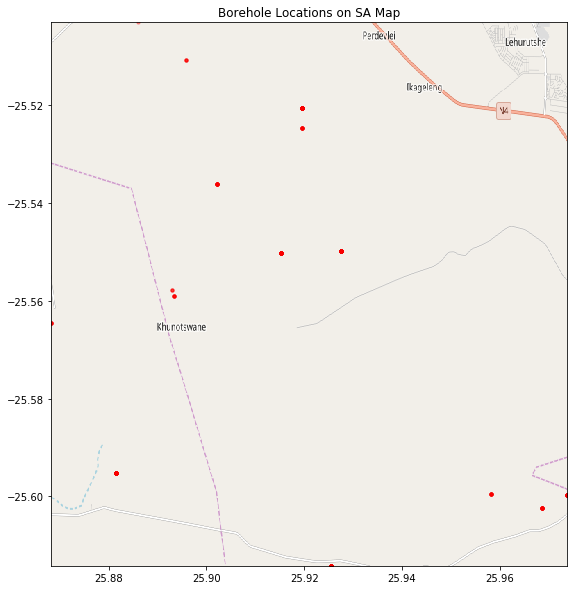

In [11]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(BH_locs.longitude, BH_locs.latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Borehole Locations on SA Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(SAmap, zorder=0, extent = BBox, aspect= 'equal')

In [12]:
#sadc_map = gpd.read_file('/Users/badisa/TWC_Datasets/NGA/NGA_Data_for_the_area_13_09_2019/South_Africa_Polygon.shp')
sadc_map = gpd.read_file('/Users/badisa/TWC_Datasets/Ramotswa_Shape_files/RAMOTSW_TBA_SOUTH_AFRICA_BOREHOLES.shp')


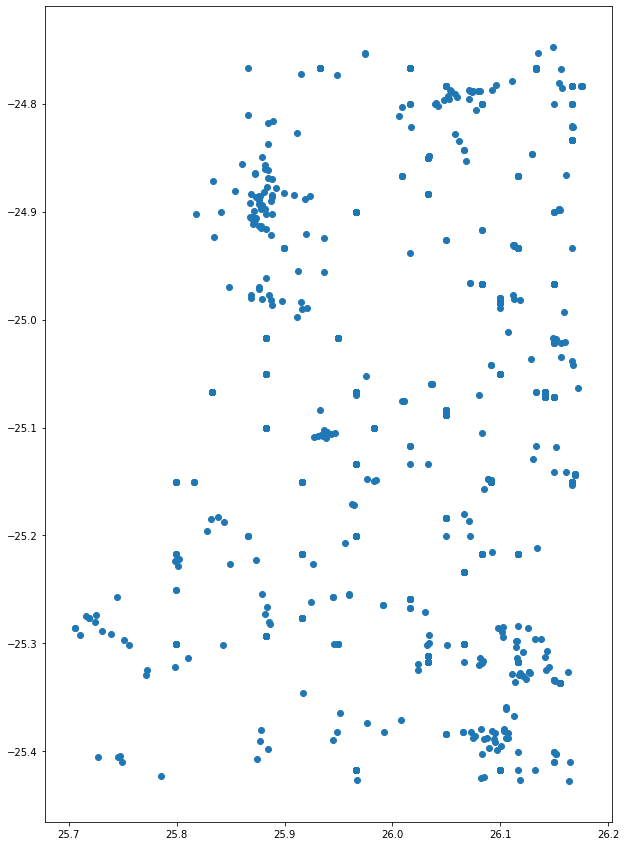

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
sadc_map.plot(ax = ax)

In [14]:
crs = {'init':'epsg:4326'}

In [15]:
geometry = [Point(xy) for xy in zip(BH_locs["longitude"], BH_locs["latitude"])]

In [16]:
geo_df = gpd.GeoDataFrame(BH_locs,
                      crs =crs,
                      geometry = geometry)
geo_df.head()

,bh_id,swl_m,latitude,longitude,geometry
0,A3N0513,12.10,-25.56447,25.86831,POINT (25.86831 -25.56447)
1,A3N0513,14.82,-25.56447,25.86831,POINT (25.86831 -25.56447)
2,A3N0513,10.06,-25.56447,25.86831,POINT (25.86831 -25.56447)
3,A3N0513,10.06,-25.56447,25.86831,POINT (25.86831 -25.56447)
4,A3N0513,8.79,-25.56447,25.86831,POINT (25.86831 -25.56447)


In [17]:
# plot each unique bh_ID
geo_df['bh_id'].unique()

array(['A3N0513', 'A3N0521', 'D4N2517', 'A3N0514', 'A1N0001', 'A3N0015',
       'D4N2516', 'D4N1658', 'A1N0002', 'D4N1468', 'A3N0519', 'D4N2515',
       'A3N0516', 'D4N1666', 'A1N0003'], dtype=object)

Text(0.5, 1, 'BH Locations')

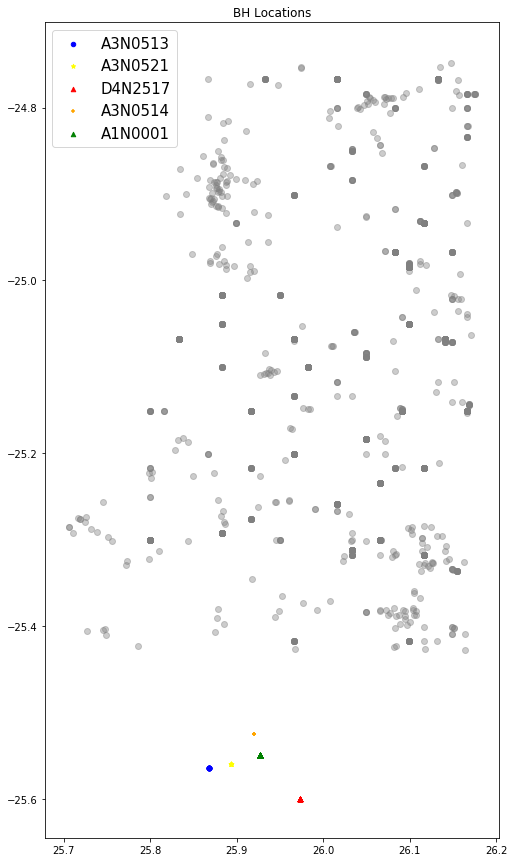

In [18]:
fig,ax = plt.subplots(figsize = (15,15))
sadc_map.plot(ax = ax, alpha = 0.4, color = "grey")
#for bhid in geo_df['bh_id'].unique():
geo_df[geo_df['bh_id'] == 'A3N0513'].plot(ax = ax, markersize = 20, color ='blue', marker = "o", label = 'A3N0513') 
geo_df[geo_df['bh_id'] == 'A3N0521'].plot(ax = ax, markersize = 20, color ='yellow', marker = "*", label = 'A3N0521')
geo_df[geo_df['bh_id'] == 'D4N2517'].plot(ax = ax, markersize = 20, color ='red', marker = "^", label = 'D4N2517')
geo_df[geo_df['bh_id'] == 'A3N0514'].plot(ax = ax, markersize = 20, color ='orange', marker = "+", label = 'A3N0514')
geo_df[geo_df['bh_id'] == 'A1N0001'].plot(ax = ax, markersize = 20, color ='green', marker = "^", label = 'A1N0001')
#geo_df[geo_df['swl_m'] < 10.00].plot(ax = ax, markersize = 20, color ='red', marker = "^", label = ">10") 
plt.legend(prop={'size':15})
plt.title("BH Locations")


# markers
#df.plot(style=['+-','o-','.--','s:'])

# Interactive maps with Bokeh & GPD
 * TODO
 * To track potential temporal changes in concentration.
 * When monitoring a specific contaminant, the frequency of observation can be calculated based on travel time



In [19]:
pwd

'/Users/badisa'